In [160]:
# Setup
import os
import scanpy as sc
import pandas as pd

In [190]:
# Run dir
run_dir = '/home/xlv0877/proj_home/dl/models/run4/rl+kl+ce/lightning_logs/version_9'
latent = sc.read(os.path.join(run_dir, 'latent.h5ad'))
report = pd.read_csv(os.path.join(run_dir, 'report.csv'), index_col=0)

In [191]:
# Add mean mixscale over perturbations
latent.obs['abs_ms'] = latent.obs.mixscale_score.abs()
report = report.merge(latent.obs.groupby('perturbation', observed=True).abs_ms.mean().reset_index(), on='perturbation')

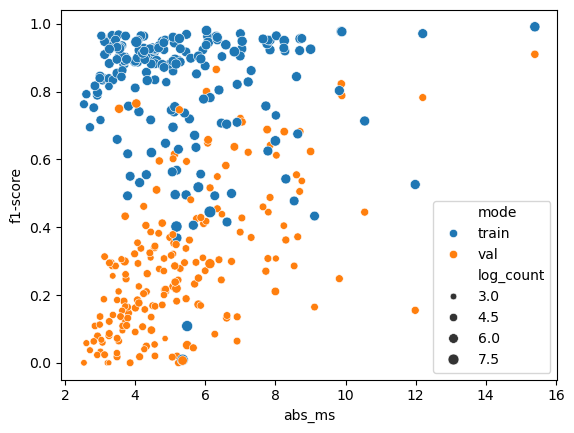

In [199]:
ax = sns.scatterplot(report, x='abs_ms', y='f1-score', hue='mode', size='log_count')

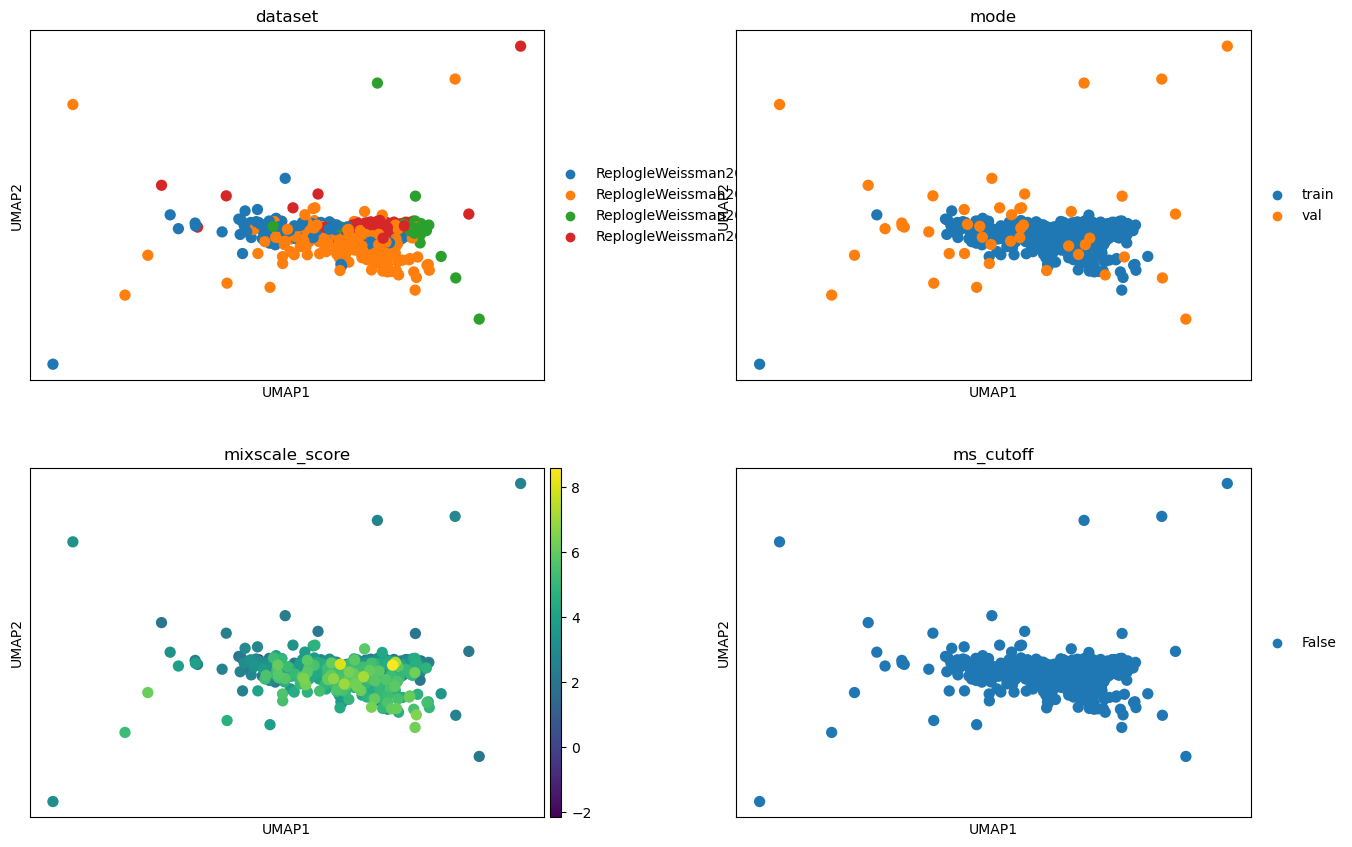

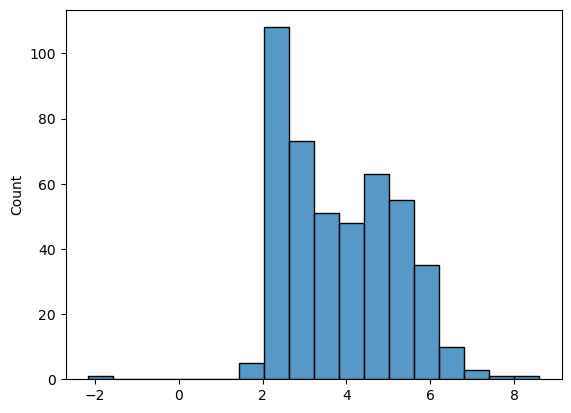

In [172]:
# Check individual perturbation
target = 'MRPS6'
tmp = latent[latent.obs.perturbation==target].copy()
tmp.obs['ms_cutoff'] = tmp.obs.mixscale_score > 10
sc.pl.umap(tmp, color=['dataset', 'mode', 'mixscale_score', 'ms_cutoff'], wspace=0.25, ncols=2)
ax = sns.histplot(tmp.obs.mixscale_score.values.tolist())

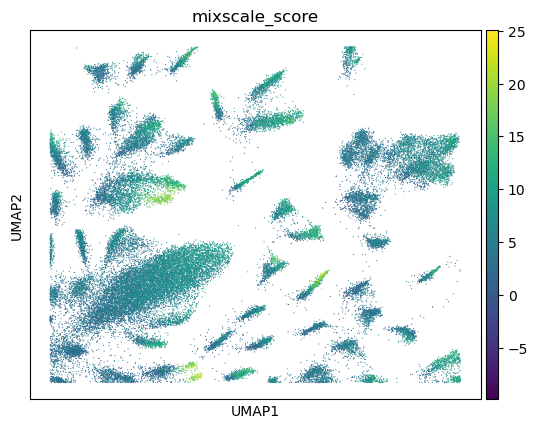

In [120]:
tmp = latent[latent.obs.perturbation==target].obsm['X_umap']
max_boundaries = tmp.max(axis=0)
min_boundaries = tmp.min(axis=0)
# Crop umap
umap = latent.obsm['X_umap']
mask = (umap[:,0]<max_boundaries[0]) & (umap[:,0]>min_boundaries[0]) & (umap[:,1]<max_boundaries[1]) & (umap[:,1]>min_boundaries[1])
tmp = latent[mask].copy()
sc.pl.umap(tmp, color='mixscale_score')

In [11]:
report = pd.read_csv(os.path.join(run_dir, 'report.csv'), index_col=0)

In [36]:
report[report['mode']=='val'].sort_values('f1-score').iloc[100:120]

,cls_label,precision,recall,f1-score,support,log_count,mode,perturbation_direction,perturbation,std
351,neg;SRPRB,0.215686,0.220000,0.217822,50.0,3.912023,val,neg,SRPRB,3.785939
259,neg;MCM6,0.175258,0.293103,0.219355,58.0,4.060443,val,neg,MCM6,12.583057
335,neg;SF3A2,0.214286,0.226415,0.220183,53.0,3.970292,val,neg,SF3A2,7.588368
223,neg;DRAP1,0.209677,0.245283,0.226087,53.0,3.970292,val,neg,DRAP1,1.500000
334,neg;SART3,0.226190,0.231707,0.228916,82.0,4.406719,val,neg,SART3,6.403124
278,neg;NAA25,0.285714,0.196078,0.232558,51.0,3.931826,val,neg,NAA25,6.344289
285,neg;NIFK,0.200000,0.283019,0.234375,53.0,3.970292,val,neg,NIFK,7.762087
345,neg;SNAPC3,0.194805,0.306122,0.238095,49.0,3.891820,val,neg,SNAPC3,4.573474
330,neg;RPS19,0.223684,0.265625,0.242857,64.0,4.158883,val,neg,RPS19,12.780193
362,neg;TRAPPC11,0.236842,0.257143,0.246575,70.0,4.248495,val,neg,TRAPPC11,10.214369


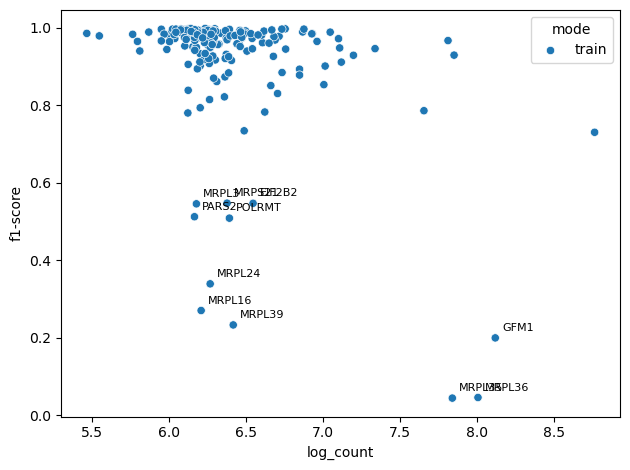

In [29]:
# Check support vs. performance
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
df = report[report['mode'] == 'train']
sns.scatterplot(data=df, x='log_count', y='f1-score', hue='mode', ax=ax)

# Define annotation window
x_min, x_max = 5.0, 8.5
y_min, y_max = 0.0, 0.6

# Annotate points within this range
for i, row in df.iterrows():
    if x_min <= row['log_count'] <= x_max and y_min <= row['f1-score'] <= y_max:
        ax.annotate(
            row.get('perturbation', i),
            (row['log_count'], row['f1-score']),
            textcoords="offset points",
            xytext=(5, 5),
            ha='left',
            fontsize=8,
            color='black'
        )

plt.tight_layout()
plt.show()


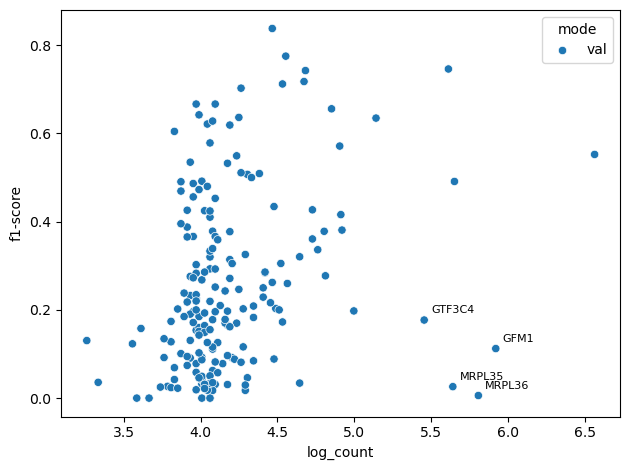

In [27]:
# Check support vs. performance
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
df = report[report['mode'] == 'val']
sns.scatterplot(data=df, x='log_count', y='f1-score', hue='mode', ax=ax)

# Define annotation window
x_min, x_max = 5.0, 8.5
y_min, y_max = 0.0, 0.4

# Annotate points within this range
for i, row in df.iterrows():
    if x_min <= row['log_count'] <= x_max and y_min <= row['f1-score'] <= y_max:
        ax.annotate(
            row.get('perturbation', i),
            (row['log_count'], row['f1-score']),
            textcoords="offset points",
            xytext=(5, 5),
            ha='left',
            fontsize=8,
            color='black'
        )

plt.tight_layout()
plt.show()


In [15]:
# Check performance vs. number of different sources
import seaborn as sns

tmp = latent.obs.groupby(['mode', 'perturbation'], observed=True).apply(lambda x: x['celltype'].value_counts().std()).reset_index()
tmp.columns = ['mode', 'perturbation', 'std']
report = report.merge(tmp, on=['mode', 'perturbation'])

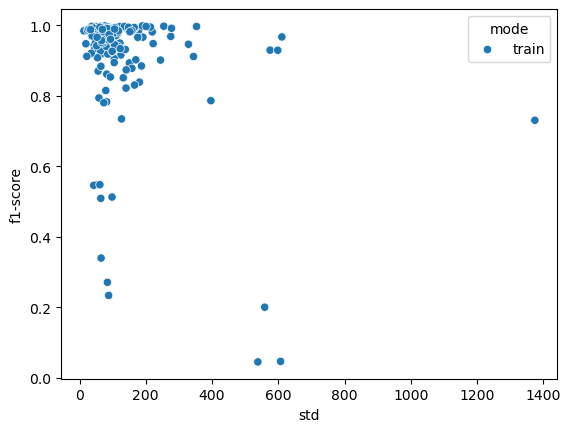

In [17]:
ax = sns.scatterplot(report[report['mode']=='train'], x='std', y='f1-score', hue='mode')

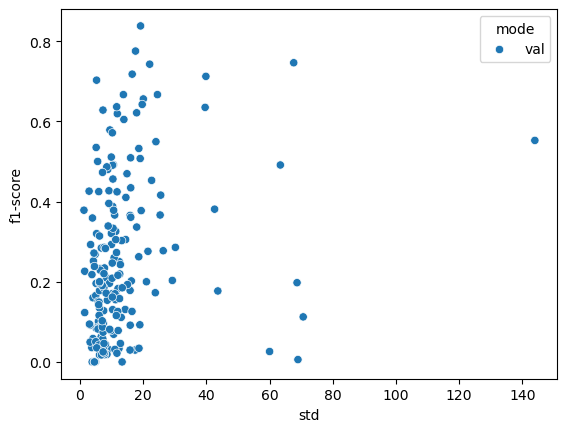

In [18]:
ax = sns.scatterplot(report[report['mode']=='val'], x='std', y='f1-score', hue='mode')